In [3]:
import pandas as pd #Biblioteca de analise e manipulação de dados
import matplotlib.pyplot as plt #Traçagem de gráficos
import seaborn as sns #Fork do matplot para visualização de dados estatisticos
import itertools #Funções para iteração de ciclos
from collections import Counter #Manipulaão de coleções

#Biblioteca de Machine Learning para Py
from sklearn.model_selection import train_test_split  #Separação de dados para criação de testes
from sklearn.metrics import confusion_matrix  #Medição da precisão de uma classificação
from sklearn.feature_extraction.text import CountVectorizer  #Transforma uma coleção de docs texto em tokens para contagem
from sklearn.naive_bayes import MultinomialNB   #Equação de Naive Bayes Multinomial

In [8]:
#Import do ficheiro CSV e tratamento dos daods

## DATA SETS ---------
smsData = pd.read_csv("spam.csv", encoding = "latin-1", usecols=["v1", "v2"])## importa o data set como um data-frame

## TRANSFORMS
smsData.columns = ["Classificação", "Mensagem"]


smsData.head()

,Classificação,Mensagem
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


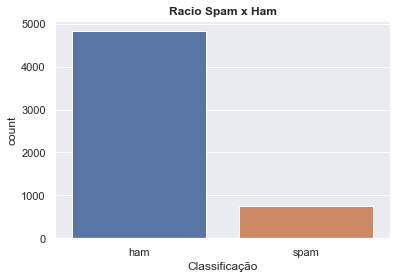

In [11]:
sns.set()
sns.countplot(data = smsData, x= smsData["Classificação"]).set_title("Racio Spam x Ham", fontweight = "bold")
plt.show()

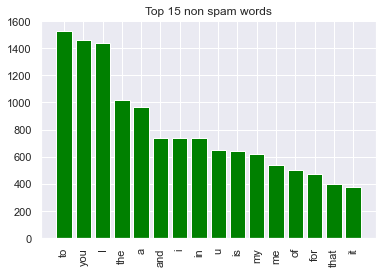

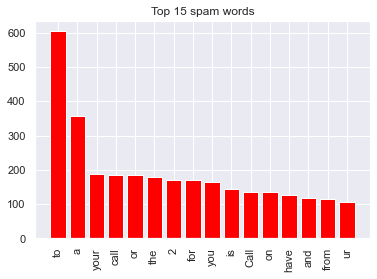

In [15]:
non_spam_messages = smsData[smsData["Classificação"]=="ham"]["Mensagem"] #filters non-spam (ham) messages
l = [message.split() for message in non_spam_messages] #creates lists of words from each message
no_spam_words = list(itertools.chain.from_iterable(l)) #concatenates all lists of words into one

spam_messages = smsData[smsData["Classificação"]=="spam"]["Mensagem"] 
k = [message.split() for message in spam_messages]
spam_words = list(itertools.chain.from_iterable(k))

non_spam = Counter(no_spam_words) #creates dictionary with occurrences of each no_spam word
spam = Counter(spam_words) #creates dictionary occurences of each spam word (creates dictionary)

non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True) #creates list sorted descending by value (number of occurences) 
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True) 

top15_spam = spam[:16]
top15_nonspam = non_spam[:16]

#slice word and occurences so I can easily plot them
top_words_nonspam = [i[0] for i in top15_nonspam]  #(to,1530) [0]=to [1]=1530  
top_occurences_nonspam = [i[1] for i in top15_nonspam]

top_words_spam = [i[0] for i in top15_spam]       
top_occurences_spam = [i[1] for i in top15_spam]

plt.bar(top_words_nonspam, top_occurences_nonspam, color = 'green')
plt.title("Top 15 non spam words")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(top_words_spam, top_occurences_spam, color = "red")
plt.title("Top 15 spam words")
plt.xticks(rotation='vertical')
plt.show()

In [18]:
X = smsData["Mensagem"]
y = smsData["Classificação"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_features = 300, stop_words = 'english') #1% / 300 occurences 
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [19]:
model = MultinomialNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9447236180904522


In [20]:
y_test_pred = model.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[1168,   28],
       [  49,  148]], dtype=int64)

In [21]:
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  model.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("You are the one million costumer prize winner")

'This message is spam!'